In [985]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import pandas as pd
from functions import add_counts, remove_background
import seaborn as sb

import datasets

In [986]:
data_background = pd.read_csv("calibration_and_background/background_spectrum.csv")
data_x1 = pd.read_csv("spectrum_x/spectrum_doos_x_1.csv")
data_x2 = pd.read_csv("spectrum_x/spectrum_doos_x_2.csv")
data_x3 = pd.read_csv("spectrum_x/spectrum_doos_x_3.csv")
data_x4 = pd.read_csv("spectrum_x/spectrum_doos_x_4.csv")
data_x5 = pd.read_csv("spectrum_x/spectrum_doos_x_5.csv")
data_source = pd.read_csv("calibration_and_background/spectrum_cali.csv")

data_y1 = pd.read_csv("spectrum_y/spectrum_doos_y_1.csv")
data_y2 = pd.read_csv("spectrum_y/spectrum_doos_y_2.csv")
data_y3 = pd.read_csv("spectrum_y/spectrum_doos_y_3.csv")
data_y4 = pd.read_csv("spectrum_y/spectrum_doos_y_4.csv")

In [987]:
def adjust(dataset_1, dataset_2):
    x_data = []
    y_data = []
    
    for i, j in zip(dataset_1, dataset_2):
        if i > 180 and i < 240:
            x_data.append(i)
            y_data.append(j)
            
    return x_data, y_data

split datasets into lists

In [988]:
pulseheights_background = data_background["pulseheight"]
counts_background_A = data_background["counts_ch_A"]
counts_background_B = data_background["counts_ch_B"]
counts_tot_background = add_counts(counts_background_A, counts_background_B)

counts_A_x1 = remove_background(data_x1["counts_ch_A"], counts_background_A)
counts_B_x1 = remove_background(data_x1["counts_ch_B"], counts_background_B)
counts_total_x1 = add_counts(counts_A_x1, counts_B_x1)

counts_A_x2 = remove_background(data_x2["counts_ch_A"], counts_background_A)
counts_B_x2 = remove_background(data_x2["counts_ch_B"], counts_background_B)
counts_total_x2 = add_counts(counts_A_x2, counts_B_x2)

counts_A_x3 = remove_background(data_x3["counts_ch_A"], counts_background_A)
counts_B_x3 = remove_background(data_x3["counts_ch_B"], counts_background_B)
counts_total_x3 = add_counts(counts_A_x3, counts_B_x3)

counts_A_x4 = remove_background(data_x4["counts_ch_A"], counts_background_A)
counts_B_x4 = remove_background(data_x4["counts_ch_B"], counts_background_B)
counts_total_x4 = add_counts(counts_A_x4, counts_B_x4)

counts_A_x5 = remove_background(data_x5["counts_ch_A"], counts_background_A)
counts_B_x5 = remove_background(data_x5["counts_ch_B"], counts_background_B)
counts_total_x5 = add_counts(counts_A_x5, counts_B_x5)

pulseheights = data_source["pulseheight"]
counts_A_source = data_source["counts_ch_A"]
counts_B_source = data_source["counts_ch_B"]
counts_total_source = add_counts(counts_A_source, counts_B_source)


In [989]:

counts_A_y1 = remove_background(data_y1["counts_ch_A"], counts_background_A)
counts_B_y1 = remove_background(data_y1["counts_ch_B"], counts_background_B)
counts_total_y1 = add_counts(counts_A_y1, counts_B_y1)

counts_A_y2 = remove_background(data_y2["counts_ch_A"], counts_background_A)
counts_B_y2 = remove_background(data_y2["counts_ch_B"], counts_background_B)
counts_total_y2 = add_counts(counts_A_y2, counts_B_y2)

counts_A_y3 = remove_background(data_y3["counts_ch_A"], counts_background_A)
counts_B_y3 = remove_background(data_y3["counts_ch_B"], counts_background_B)
counts_total_y3 = add_counts(counts_A_y3, counts_B_y3)

counts_A_y4 = remove_background(data_y4["counts_ch_A"], counts_background_A)
counts_B_y4 = remove_background(data_y4["counts_ch_B"], counts_background_B)
counts_total_y4 = add_counts(counts_A_y4, counts_B_y4)

In [990]:

# plt.plot(pulseheights_background, counts_background_A, color ='red', label = 'channel A')
# plt.plot(pulseheights_background, counts_background_B, color = 'blue', label = 'channel B')
# plt.plot(pulseheights_background, counts_tot_background, color = 'green', label = 'channel A and B')
# plt.gca().set_facecolor('lightgrey')
# plt.title("Spectrum without source")
# plt.legend(loc = 'upper right')
# plt.ylabel("counts")
# plt.xlabel("pulseheights (mV)")
# plt.show()

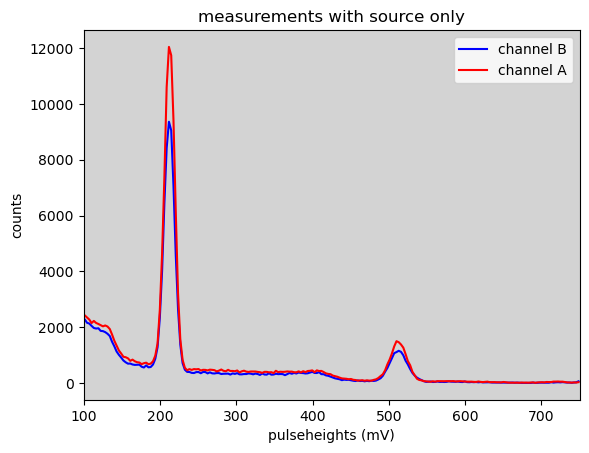

In [991]:
plt.plot(pulseheights, counts_B_source, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_source, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with source only")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

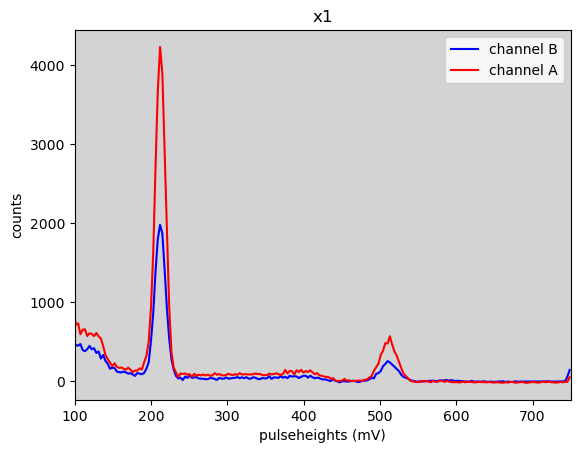

In [992]:
plt.plot(pulseheights, counts_B_x1, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x1, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x1")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

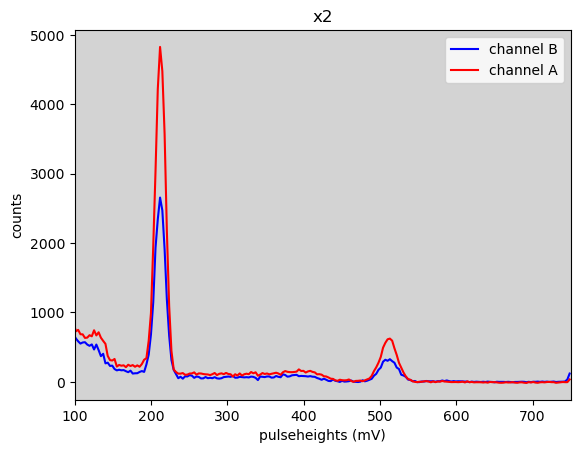

In [993]:
plt.plot(pulseheights, counts_B_x2, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x2, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x2")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

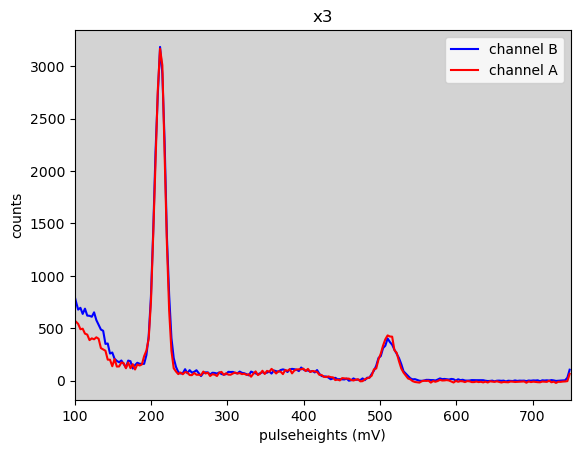

In [994]:
plt.plot(pulseheights, counts_B_x3, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x3, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x3")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

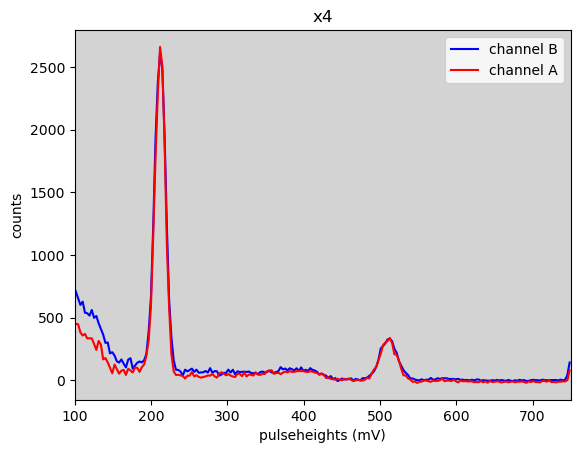

In [995]:
plt.plot(pulseheights, counts_B_x4, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x4, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x4")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

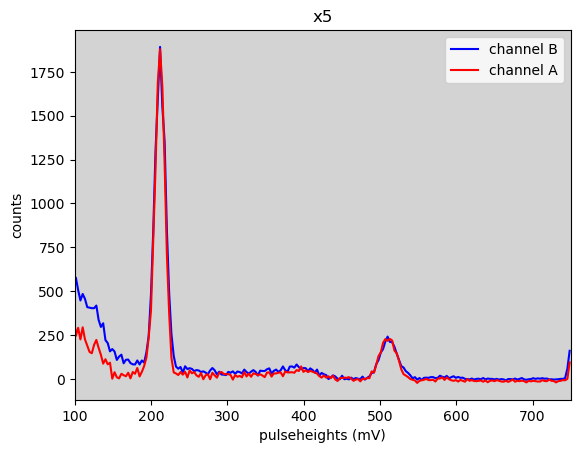

In [996]:
plt.plot(pulseheights, counts_B_x5, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x5, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x5")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

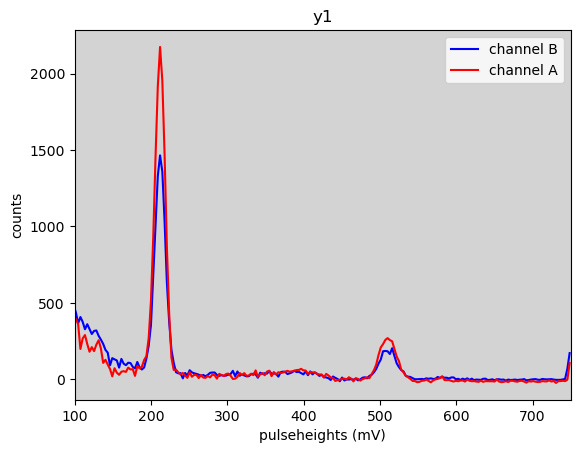

In [997]:
plt.plot(pulseheights, counts_B_y1, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y1, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y1")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

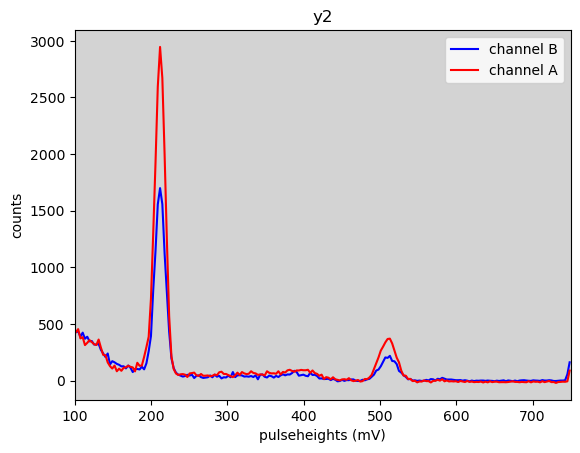

In [998]:
plt.plot(pulseheights, counts_B_y2, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y2, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y2")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

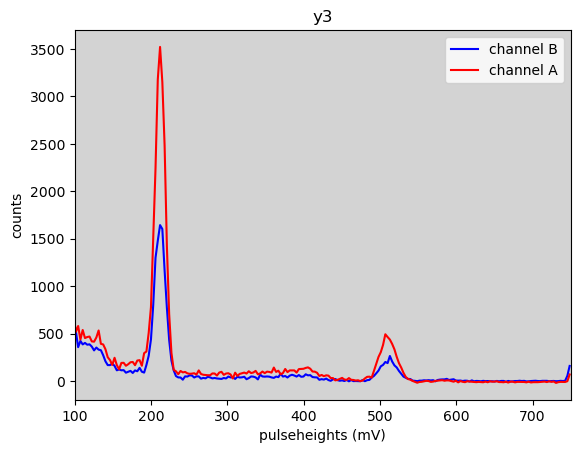

In [999]:
plt.plot(pulseheights, counts_B_y3, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y3, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y3")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

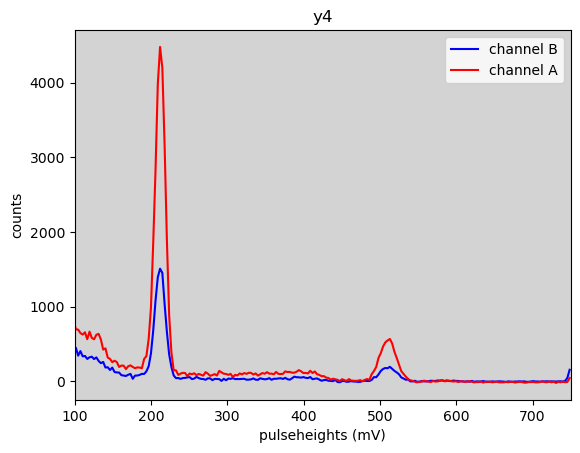

In [1000]:
plt.plot(pulseheights, counts_B_y4, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y4, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y4")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

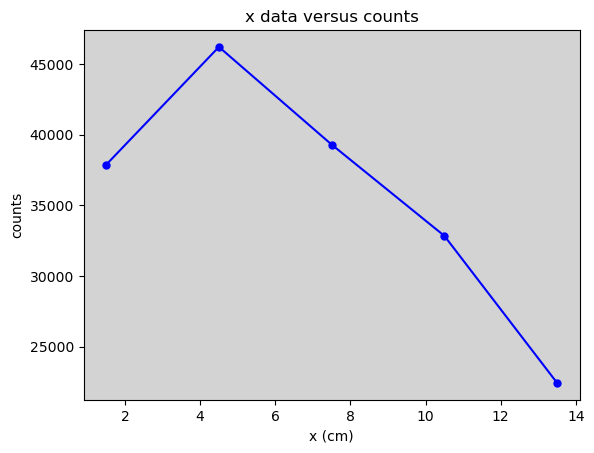

In [1001]:
x_loc = [1.5, 4.5, 7.5, 10.5, 13.5]

_, counts_A_x1 = adjust(pulseheights, counts_A_x1)
_, counts_B_x1 = adjust(pulseheights, counts_B_x1)
_, counts_A_x2 = adjust(pulseheights, counts_A_x2)
_, counts_B_x2 = adjust(pulseheights, counts_B_x2)
_, counts_A_x3 = adjust(pulseheights, counts_A_x3)
_, counts_B_x3 = adjust(pulseheights, counts_B_x3)
_, counts_A_x4 = adjust(pulseheights, counts_A_x4)
_, counts_B_x4 = adjust(pulseheights, counts_B_x4)
_, counts_A_x5 = adjust(pulseheights, counts_A_x5)
_, counts_B_x5 = adjust(pulseheights, counts_B_x5)

x1_counts = [sum(counts_A_x1) + sum(counts_B_x1)]
x2_counts = [sum(counts_A_x2) + sum(counts_B_x2)]
x3_counts = [sum(counts_A_x3) + sum(counts_B_x3)]
x4_counts = [sum(counts_A_x4) + sum(counts_B_x4)]
x5_counts = [sum(counts_A_x5) + sum(counts_B_x5)]
x_counts = [x1_counts, x2_counts, x3_counts, x4_counts, x5_counts]

plt.plot(x_loc, x_counts, 'o-', markersize = 5, color = 'blue')

plt.gca().set_facecolor('lightgrey')
plt.title("x data versus counts")
plt.ylabel("counts")
plt.xlabel("x (cm)")
plt.show()

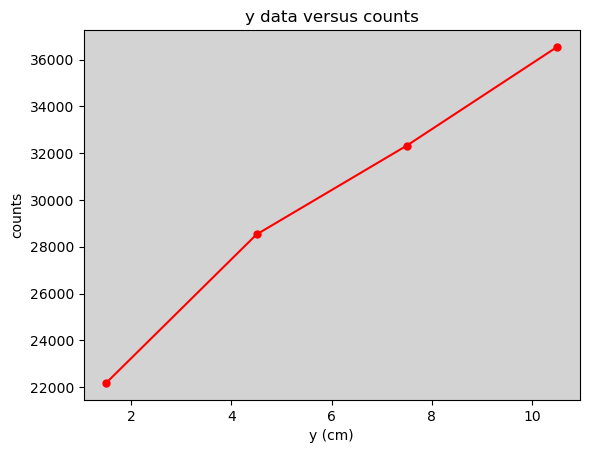

In [1002]:
y_loc = [1.5, 4.5, 7.5, 10.5]

_, counts_A_y1 = adjust(pulseheights, counts_A_y1)
_, counts_B_y1 = adjust(pulseheights, counts_B_y1)
_, counts_A_y2 = adjust(pulseheights, counts_A_y2)
_, counts_B_y2 = adjust(pulseheights, counts_B_y2)
_, counts_A_y3 = adjust(pulseheights, counts_A_y3)
_, counts_B_y3 = adjust(pulseheights, counts_B_y3)
_, counts_A_y4 = adjust(pulseheights, counts_A_y4)
_, counts_B_y4 = adjust(pulseheights, counts_B_y4)

y1_counts = [sum(counts_A_y1) + sum(counts_B_y1)]
y2_counts = [sum(counts_A_y2) + sum(counts_B_y2)]
y3_counts = [sum(counts_A_y3) + sum(counts_B_y3)]
y4_counts = [sum(counts_A_y4) + sum(counts_B_y4)]

y_counts = [y1_counts, y2_counts, y3_counts, y4_counts]

plt.plot(y_loc, y_counts, 'o-', markersize = 5, color = 'red')

plt.gca().set_facecolor('lightgrey')
plt.title("y data versus counts")
plt.ylabel("counts")
plt.xlabel("y (cm)")
plt.show()

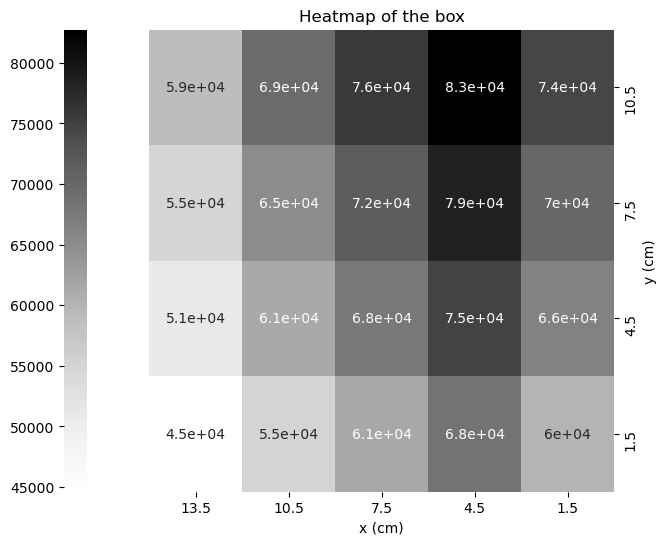

In [1003]:
x_positions = np.array([1.5, 4.5, 7.5, 10.5, 13.5]) 
y_positions = np.array([1.5, 4.5, 7.5, 10.5]) 
counts = np.array([
    [x1_counts[0] + y1_counts[0], x2_counts[0] + y1_counts[0], x3_counts[0] + y1_counts[0], 
     x4_counts[0] + y1_counts[0], x5_counts[0] + y1_counts[0]],  
    [x1_counts[0] + y2_counts[0], x2_counts[0] + y2_counts[0], x3_counts[0] + y2_counts[0], x4_counts[0]
     + y2_counts[0], x5_counts[0] + y2_counts[0]],  
    [x1_counts[0] + y3_counts[0], x2_counts[0] + y3_counts[0], x3_counts[0] + y3_counts[0], x4_counts[0]
     + y3_counts[0], x5_counts[0] + y3_counts[0]],  
    [x1_counts[0] + y4_counts[0], x2_counts[0] + y4_counts[0], x3_counts[0] + y4_counts[0], x4_counts[0]
     + y4_counts[0], x5_counts[0] + y4_counts[0]] 
])

fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sb.heatmap(counts, annot=True, xticklabels=x_positions, yticklabels=y_positions, cmap="Greys", cbar_kws={"location": "left"})

ax.invert_yaxis()
ax.invert_xaxis()

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.title("Heatmap of the box")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()


In [1004]:
_, counts_A_source = adjust(pulseheights, counts_A_source)
_, counts_B_source = adjust(pulseheights, counts_B_source)

print(sum(counts_A_source) + sum(counts_B_source))

138963


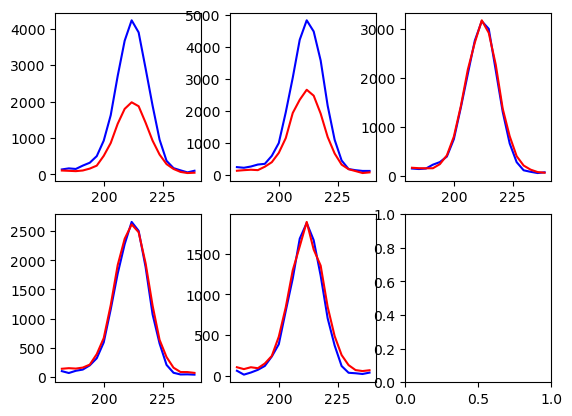

In [1005]:
fig, ax = plt.subplots(2, 3)
ax[0, 0].plot(_, counts_A_x1, color = 'blue')
ax[0, 0].plot(_, counts_B_x1, color = 'red')
ax[0, 1].plot(_, counts_A_x2, color = 'blue')
ax[0, 1].plot(_, counts_B_x2, color = 'red')
ax[0, 2].plot(_, counts_A_x3, color = 'blue')
ax[0, 2].plot(_, counts_B_x3, color = 'red')
ax[1, 0].plot(_, counts_A_x4, color = 'blue')
ax[1, 0].plot(_, counts_B_x4, color = 'red')
ax[1, 1].plot(_, counts_A_x5, color = 'blue')
ax[1, 1].plot(_, counts_B_x5, color = 'red')
plt.show()

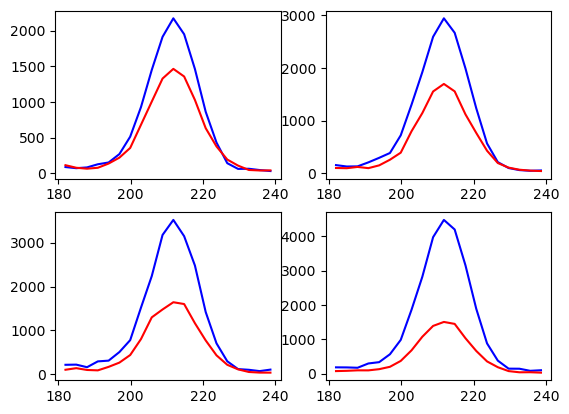

In [1006]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(_, counts_A_y1, color = 'blue')
ax[0, 0].plot(_, counts_B_y1, color = 'red')
ax[0, 1].plot(_, counts_A_y2, color = 'blue')
ax[0, 1].plot(_, counts_B_y2, color = 'red')
ax[1, 0].plot(_, counts_A_y3, color = 'blue')
ax[1, 0].plot(_, counts_B_y3, color = 'red')
ax[1, 1].plot(_, counts_A_y4, color = 'blue')
ax[1, 1].plot(_, counts_B_y4, color = 'red')
plt.show()